A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [131]:
import numpy as np

import pandas as pd
from scipy import interpolate
import scipy.integrate as integrate
import matplotlib,pylab as plt

Punto 2

In [181]:
#definimos T y To

g= 9.806


def to(l,g= 9.80665):
  
  return 2*np.pi*np.sqrt(l/g)

def t(theta,l,g=9.80665):
  s = np.sin(theta/2)

  return (2*to(l,g)/np.pi)*integrate.quad(lambda x: (1)/(np.sqrt(1-s**2*np.sin(x)**2)),0,np.pi/2)[0]

vectt = np.vectorize(t)

theta = np.linspace(0,np.pi/2,100)
theta = np.asarray(theta)
l = 10

Lista = np.ones(theta.shape[0])*to(l)
Lista

array([6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482328,
       6.34482328, 6.34482328, 6.34482328, 6.34482328, 6.34482

In [182]:
vectt(theta,l)

array([6.34482328, 6.34492312, 6.34522263, 6.34572189, 6.34642096,
       6.34731998, 6.3484191 , 6.3497185 , 6.35121842, 6.35291912,
       6.35482089, 6.35692405, 6.35922899, 6.3617361 , 6.36444581,
       6.3673586 , 6.37047499, 6.37379551, 6.37732075, 6.38105134,
       6.38498792, 6.38913119, 6.3934819 , 6.3980408 , 6.40280871,
       6.40778649, 6.41297501, 6.41837521, 6.42398807, 6.42981459,
       6.43585583, 6.44211288, 6.44858689, 6.45527903, 6.46219053,
       6.46932267, 6.47667675, 6.48425415, 6.49205628, 6.50008459,
       6.50834058, 6.51682582, 6.52554192, 6.53449052, 6.54367334,
       6.55309214, 6.56274875, 6.57264502, 6.5827829 , 6.59316437,
       6.60379147, 6.61466631, 6.62579106, 6.63716794, 6.64879926,
       6.66068737, 6.6728347 , 6.68524374, 6.69791706, 6.7108573 ,
       6.72406716, 6.73754944, 6.75130701, 6.76534279, 6.77965983,
       6.79426123, 6.80915019, 6.82432998, 6.83980399, 6.85557568,
       6.87164861, 6.88802645, 6.90471296, 6.921712  , 6.93902

In [183]:
vectt(theta,l)/Lista

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

In [184]:
df = pd.DataFrame({"Theta" : theta , "grados" : theta*180/np.pi , "cociente" : vectt(theta,l)/Lista})
df

,Theta,grados,cociente
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


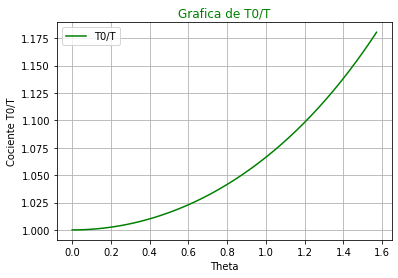

In [188]:
#Graficación de T0/T

plt.plot(df.Theta , df.cociente, label = "T0/T", color = "green")
plt.title("Grafica de T0/T",color="green")
plt.ylabel("Cociente T0/T")
plt.xlabel("Theta")
plt.show
plt.grid()
plt.legend()

Cuando tenemos $\alpha$ = 0 hace que el denominador de la funcion sea 1 por lo tanto

reolviendo la ecuacion tenemos que $T = T0$


punto 1

In [240]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [241]:
df =  pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")

c = np

In [242]:
x = np.linspace(0, 619)
c = np.polyfit(df.hours, df.followers, 2)
cp = np.poly1d(c)

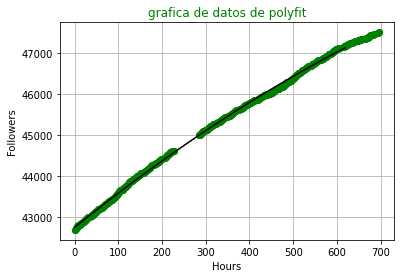

In [243]:
plt.plot(df.hours, df.followers,'ro', color= "green")
plt.plot(x,cp( x),color = "black")
plt.ylabel("Followers")
plt.xlabel("Hours")
plt.title("grafica de datos de polyfit",color="green")
plt.grid()

In [244]:
vel =cp.deriv()
print(vel)



 
-0.004875 x + 8.552


In [245]:
print("la velocidad inicial 0 es =",vel(0), "follower/hour")

la velocidad inicial 0 es = 8.552137792664016 follower/hour


In [247]:
acel = vel.deriv()
print(acel)

 
-0.004875


In [248]:
print("la aceleracion es de = ", acel,"followers/hour**2")

la aceleracion es de =   
-0.004875 followers/hour**2


In [249]:
opti = optimize.newton(v,619)

In [250]:
print("en la posición", opti, "la velocidad llega a cero")

en la posición 1754.1931385698638 la velocidad llega a cero


In [252]:
maximos = cp(opti)

print("dejará de ganar seguidores en el tiempo", maximos, "horas")

dejará de ganar seguidores en el tiempo 50262.136729011865 horas
